# Results

## Contour Compatibility

### Corpus

Conser's Aeschylus: **80.2%** compatibility.

For Aristophanes: ≈ **81.8**!

In [ ]:
from src.comp import compatibility_corpus, compatibility_ratios_to_stats

all_sets = compatibility_corpus('data/compiled/')
total_comp = compatibility_ratios_to_stats(all_sets)

print(f'Total compatibility: {total_comp}')


Total compatibility: 0.8182171237378264


### Play

	ach:	0.8170377541142304
	eq:	0.8115438108484005
	nu:	0.82
	v:	0.817450495049505
	pax:	0.82531328320802
	av:	0.8145285935085008
	lys:	0.8303571428571429
	th:	0.812807881773399
	ra:	0.8048780487804879


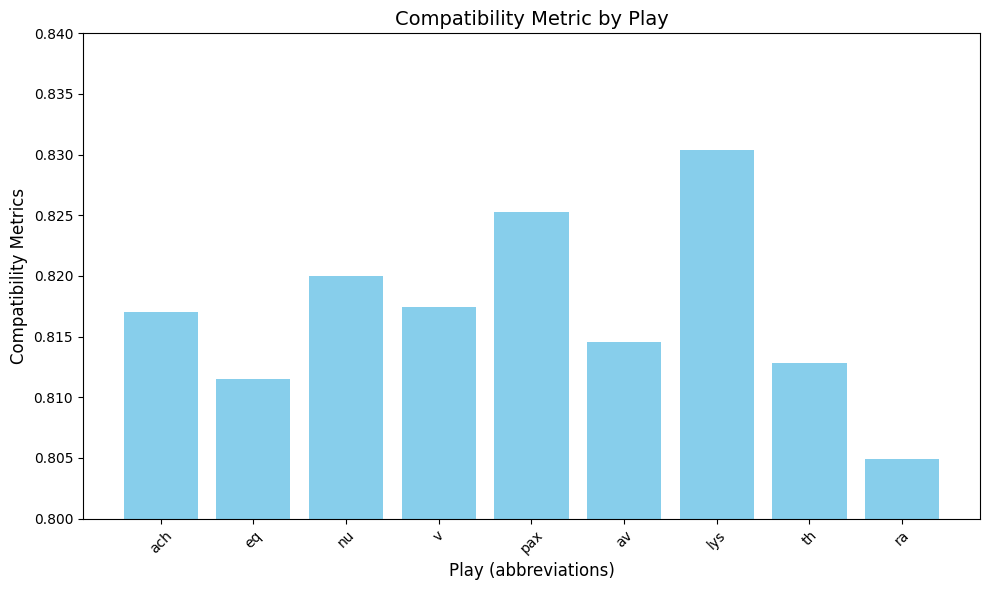

In [1]:
from src.comp import compatibility_play, compatibility_ratios_to_stats
from visualize_play_dict import visualize_play_dict

def prepare_compatibility_stat(abbreviation):
    list = compatibility_play(f'data/compiled/responsion_{abbreviation}_compiled.xml')
    return compatibility_ratios_to_stats(list)
    

abbreviations = [
    'ach',
    'eq',
    'nu',
    'v',
    'pax',
    'av',
    'lys',
    'th',
    'ra'
]

play_dict = {}
for play in abbreviations:
    play_dict[play] = prepare_compatibility_stat(play)
    print(f'\t{play}:\t{play_dict[play]}')

visualize_play_dict(play_dict)


